# Regression Diagnostics and Transformations in Data Science

## Topics Covered:

- Regression Diagnostics and Transformations
- Feature Transformations
  - Linear: Scaling and shifting
  - Non-linear: Log transformations, polynomial regression
- Regression Assumptions (LINE)
- Visualizations and Statistical Tests
- Practice Exercises

---

## Introduction

In real-world data, assumptions for regression don't always hold true. That's where regression diagnostics and transformations come in. Think of them like a car check-up: we want to make sure the engine (our model) is working properly, and if not, we tune it.

---

## Feature Transformations

### Linear Transformations (Scaling and Shifting)

These help to center and normalize your data.

#### Example: Standardization

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


X = pd.DataFrame({"feature": [10, 20, 30, 40, 50]})
y_pred = [11,22,33,44,55]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled 

array([[-1.41421356],
       [-0.70710678],
       [ 0.        ],
       [ 0.70710678],
       [ 1.41421356]])

**Explanation:**

- `StandardScaler()` scales data to have mean 0 and std 1.
- `.fit_transform()` both calculates stats and applies the transformation.



# Visualizations

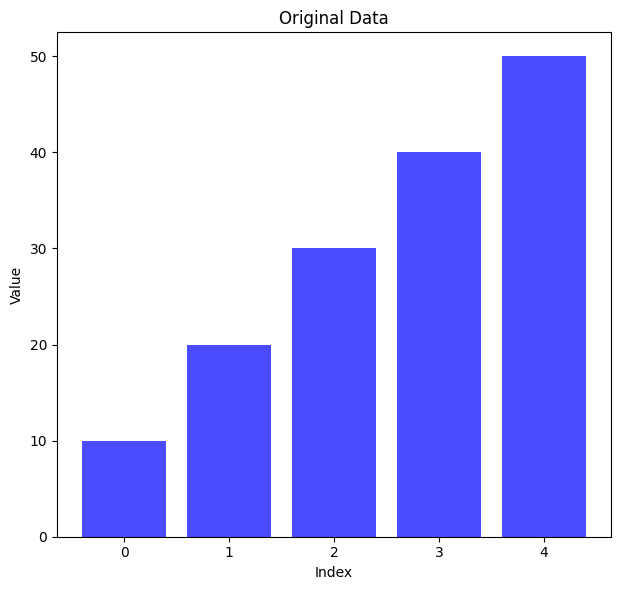

In [32]:

#Convert the scaled data back to a Dataframe
X_scaled_df = pd.DataFrame(X_scaled, columns=['feature_scaled'])

#Plotting

plt.figure(figsize=(12, 6))


#Original Data Plot

plt.subplot(1,2,1)
plt.bar(X.index, X["feature"], color="blue", alpha=0.7, label="Original Data")
plt.title('Original Data')
plt.xlabel("Index")
plt.ylabel('Value')
plt.xticks(X.index)


plt.tight_layout()
plt.show()

### Model Performance

In [33]:
#Fit the model

X = sm.add_constant(X) #Adding the constant for intercept

model = sm.OLS(y_pred, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.576e+31
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           3.53e-47
Time:                        21:08:52   Log-Likelihood:                 156.02
No. Observations:                   5   AIC:                            -308.0
Df Residuals:                       3   BIC:                            -308.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.882e-15   9.19e-15     -0.966      0.4

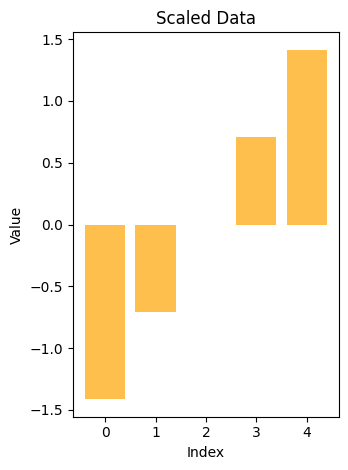

In [34]:
#Scaled Data
plt.subplot(1,2,1)
plt.bar(X.index, X_scaled_df["feature_scaled"], color="orange", alpha=0.7, label="Scaled Data")
plt.title('Scaled Data')
plt.xlabel("Index")
plt.ylabel('Value')
plt.xticks(X.index)

plt.tight_layout()
plt.show()

### Model Performance

In [35]:
#Fit the model

X = sm.add_constant(X_scaled_df) #Adding the constant for intercept

model = sm.OLS(y_pred, X_scaled_df).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.182
Model:                            OLS   Adj. R-squared (uncentered):             -0.023
Method:                 Least Squares   F-statistic:                             0.8889
Date:                Mon, 21 Jul 2025   Prob (F-statistic):                       0.399
Time:                        21:08:53   Log-Likelihood:                         -24.577
No. Observations:                   5   AIC:                                      51.15
Df Residuals:                       4   BIC:                                      50.76
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### **Shifted**

* Adds a constant (+10) to each value.
* Shape stays the same, just moves everything up.
* Useful when features need offsetting (e.g., converting Celsius to Kelvin).

### **Centered**

* Subtracts the mean (30) from each value.
* Resulting mean is 0.
* Important for algorithms that are sensitive to mean, like PCA.

### **Scaled**

* Divides each value by the standard deviation (\~15.81).
* Changes the *spread* of the data, but **not the center**.
* Not mean-centered, so values are still shifted from zero.

### **Standardized**

* Combines centering and scaling.
* Resulting mean = 0, standard deviation = 1.
* Very useful for many machine learning algorithms (like gradient descent, SVMs, logistic regression).

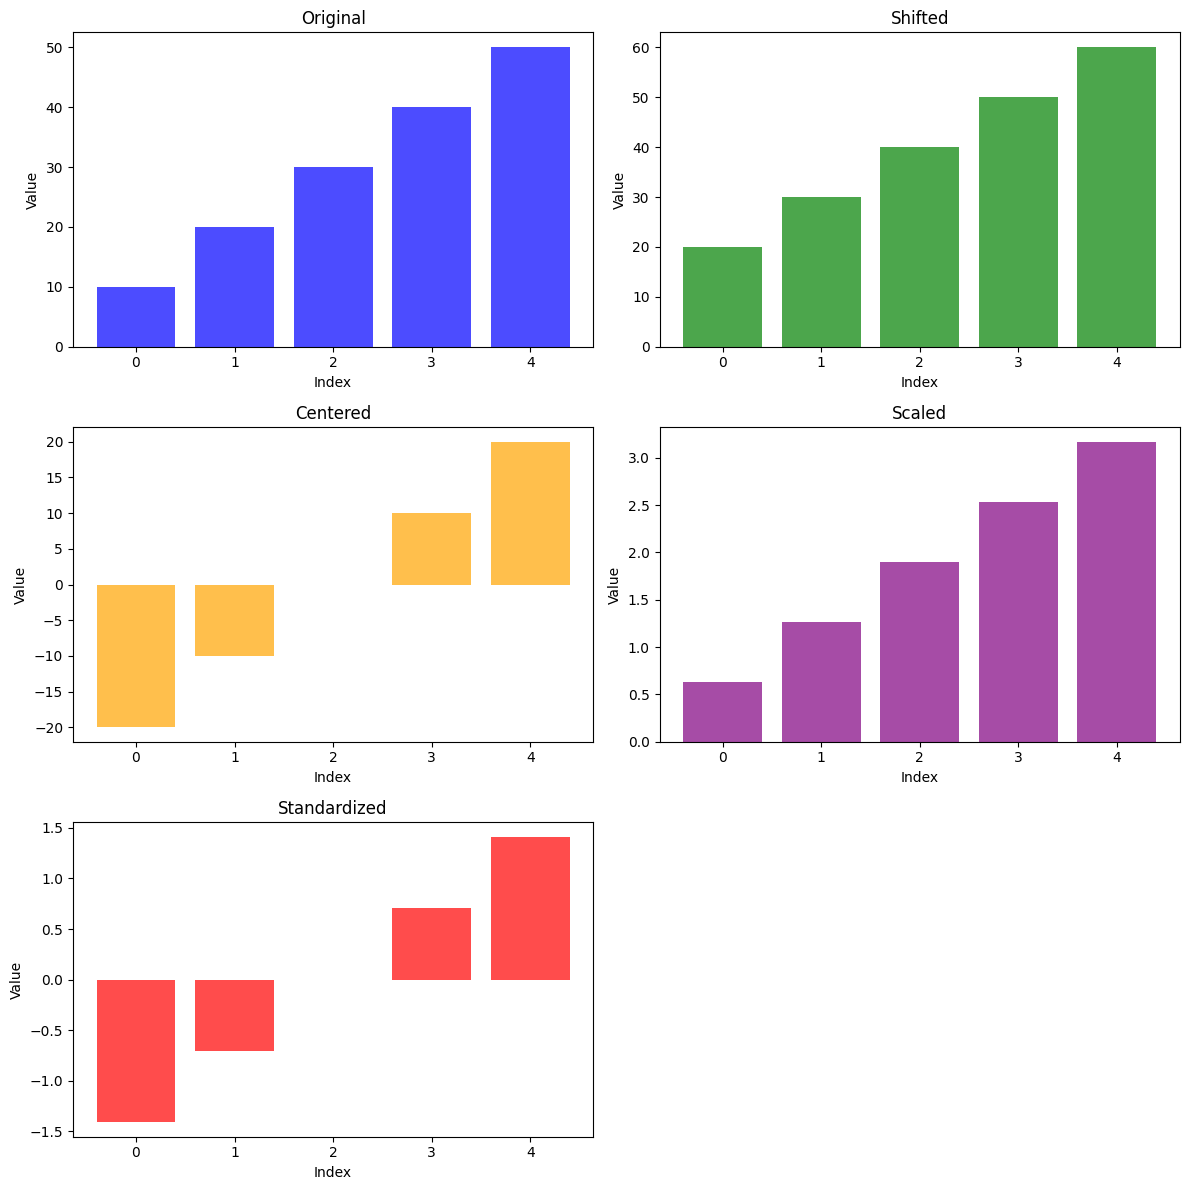

In [36]:

# Original dataset
X = pd.DataFrame({"feature": [10, 20, 30, 40, 50]})

# Shifting: Add a constant
X_shifted = X + 10

# Centering: Subtract the mean
X_centered = X - X.mean()

# Scaling: Divide by standard deviation (without centering)
X_scaled_only = X / X.std()

# Standardizing: Subtract mean and divide by std (StandardScaler)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
X_standardized = pd.DataFrame(X_standardized, columns=["feature"])

# Convert all to DataFrames with appropriate column names
X_shifted.columns = ["Shifted"]
X_centered.columns = ["Centered"]
X_scaled_only.columns = ["Scaled"]
X_standardized.columns = ["Standardized"]

# Combine into one DataFrame for plotting
combined_df = pd.concat([X, X_shifted, X_centered, X_scaled_only, X_standardized], axis=1)

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

titles = ["Original", "Shifted", "Centered", "Scaled", "Standardized"]
columns = ["feature", "Shifted", "Centered", "Scaled", "Standardized"]
colors = ["blue", "green", "orange", "purple", "red"]

for i, (col, title, color) in enumerate(zip(columns, titles, colors)):
    axes[i].bar(combined_df.index, combined_df[col], color=color, alpha=0.7)
    axes[i].set_title(title)
    axes[i].set_xlabel("Index")
    axes[i].set_ylabel("Value")

# Remove the last empty subplot (if odd number)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


### Shifted Model Performance

In [37]:
#Fit the model

X = sm.add_constant(X_shifted) #Adding the constant for intercept

model = sm.OLS(y_pred, X_shifted).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              392.0
Date:                Mon, 21 Jul 2025   Prob (F-statistic):                    3.84e-05
Time:                        21:08:55   Log-Likelihood:                         -13.591
No. Observations:                   5   AIC:                                      29.18
Df Residuals:                       4   BIC:                                      28.79
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Centered Model Performance

In [38]:
#Fit the model

X = sm.add_constant(X_centered) #Adding the constant for intercept

model = sm.OLS(y_pred, X_centered).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.182
Model:                            OLS   Adj. R-squared (uncentered):             -0.023
Method:                 Least Squares   F-statistic:                             0.8889
Date:                Mon, 21 Jul 2025   Prob (F-statistic):                       0.399
Time:                        21:08:55   Log-Likelihood:                         -24.577
No. Observations:                   5   AIC:                                      51.15
Df Residuals:                       4   BIC:                                      50.76
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Scaled Model Performance

In [39]:
#Fit the model

X = sm.add_constant(X_scaled_only) #Adding the constant for intercept

model = sm.OLS(y_pred, X_scaled_only).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.979e+31
Date:                Mon, 21 Jul 2025   Prob (F-statistic):                    3.79e-63
Time:                        21:08:55   Log-Likelihood:                          153.36
No. Observations:                   5   AIC:                                     -304.7
Df Residuals:                       4   BIC:                                     -305.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Standardized Model Performance

In [40]:
#Fit the model

X = sm.add_constant(X_standardized) #Adding the constant for intercept

model = sm.OLS(y_pred, X_standardized).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.182
Model:                            OLS   Adj. R-squared (uncentered):             -0.023
Method:                 Least Squares   F-statistic:                             0.8889
Date:                Mon, 21 Jul 2025   Prob (F-statistic):                       0.399
Time:                        21:08:55   Log-Likelihood:                         -24.577
No. Observations:                   5   AIC:                                      51.15
Df Residuals:                       4   BIC:                                      50.76
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

# Scale Both X and Y

In [41]:

scaler = StandardScaler()

X_std = scaler.fit_transform(X)
y_std = scaler.fit_transform(np.array(y_pred).reshape(-1, 1))

X_std = sm.add_constant(X_std)
model = sm.OLS(y_std, X_std).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.380e+30
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           3.55e-46
Time:                        21:08:55   Log-Likelihood:                 165.90
No. Observations:                   5   AIC:                            -327.8
Df Residuals:                       3   BIC:                            -328.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const               0   5.44e-16          0      1.0

#  Comparison of different linear transformations applied to the dataset

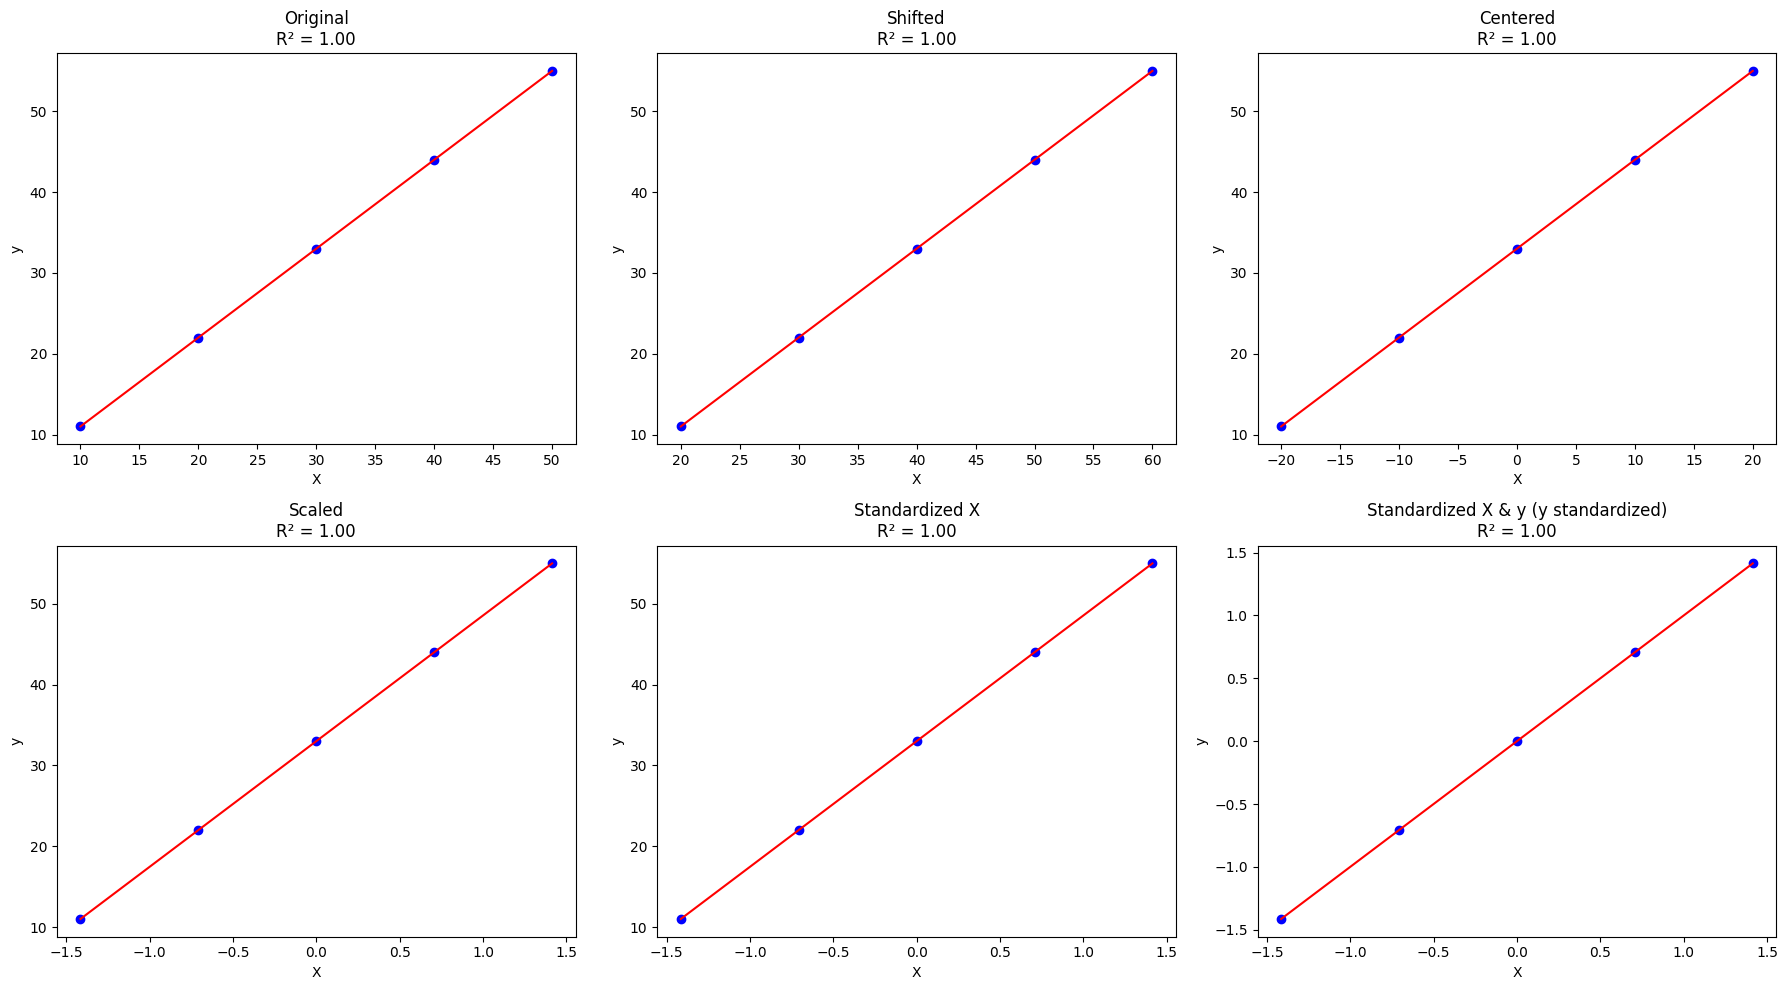

In [42]:

# Original data
X = pd.DataFrame({"feature": [10, 20, 30, 40, 50]})
y_pred = np.array([11, 22, 33, 44, 55])  # perfectly linear

y_standardized = scaler.fit_transform(y_pred.reshape(-1, 1))

# Regression helper function
def run_regression(X_input, y_input, title, subplot, standardize_y=False):
    if not isinstance(X_input, pd.DataFrame):
        X_input = pd.DataFrame(X_input, columns=['feature'])

    if standardize_y:
        y = y_standardized
        title += " (y standardized)"
    else:
        y = y_pred
    
    X_const = sm.add_constant(X_input)
    model = sm.OLS(y, X_const).fit()
    
    # Plotting
    ax = plt.subplot(2, 3, subplot)
    plt.scatter(X_input, y, color='blue')
    plt.plot(X_input, model.predict(X_const), color='red')
    plt.title(f"{title}\nR² = {model.rsquared:.2f}")
    plt.xlabel("X")
    plt.ylabel("y")

    return model.rsquared

# Plotting all
plt.figure(figsize=(18, 10))

r2_original = run_regression(X, y_pred, "Original", 1)
r2_shifted = run_regression(X_shifted, y_pred, "Shifted", 2)
r2_centered = run_regression(X_centered, y_pred, "Centered", 3)
r2_scaled = run_regression(X_scaled, y_pred, "Scaled", 4)
r2_standardized = run_regression(X_standardized, y_pred, "Standardized X", 5)
r2_both_std = run_regression(X_standardized, y_pred, "Standardized X & y", 6, standardize_y=True)

plt.tight_layout()
plt.show()


### Non-Linear Transformations

#### Log Transformation

Used when your data is skewed.

In [43]:
X = pd.DataFrame({"income": [1000, 5000, 10000, 50000, 100000]})
X["log_income"] = np.log(X["income"])
y_pred = [1200, 7000, 12000, 52000, 120000]

X

,income,log_income
0,1000,6.907755
1,5000,8.517193
2,10000,9.210340
3,50000,10.819778
4,100000,11.512925


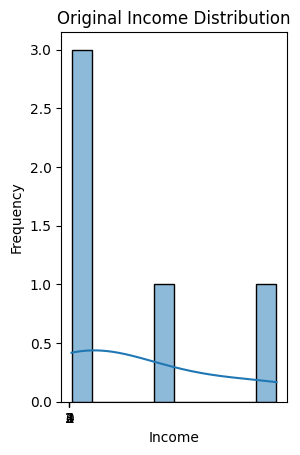

In [44]:
#Original Income Plot

plt.subplot(1,2,1)
sns.histplot(X["income"], bins=10, kde=True)
plt.title('Original Income Distribution')
plt.xlabel("Income")
plt.ylabel('Frequency')
plt.xticks(X.index)

plt.show()

### Model Performance

In [45]:
#Fit the model
X = X.drop("log_income", axis=1)

X = sm.add_constant(X) #Adding the constant for intercept

model = sm.OLS(y_pred, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     574.5
Date:                Mon, 21 Jul 2025   Prob (F-statistic):           0.000159
Time:                        21:08:59   Log-Likelihood:                -47.463
No. Observations:                   5   AIC:                             98.93
Df Residuals:                       3   BIC:                             98.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -641.2548   2467.982     -0.260      0.8

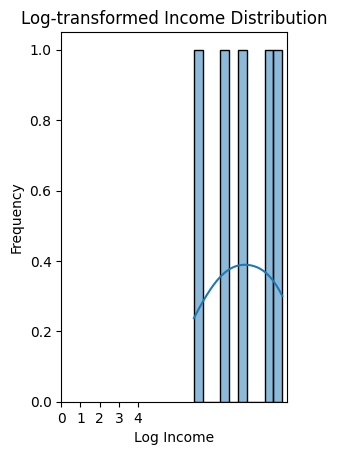

In [46]:
#Log-transformed Income Plot
X["log_income"] = np.log(X["income"])
plt.subplot(1,2,1)
sns.histplot(X["log_income"], bins=10, kde=True)
plt.title('Log-transformed Income Distribution')
plt.xlabel("Log Income")
plt.ylabel('Frequency')
plt.xticks(X.index)

plt.show()

### Model Performance

In [47]:
#Fit the model
X["log_income"] = np.log(X["income"])
X = X.drop("income", axis=1)

X = sm.add_constant(X) #Adding the constant for intercept

model = sm.OLS(y_pred, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     9.073
Date:                Mon, 21 Jul 2025   Prob (F-statistic):             0.0571
Time:                        21:09:00   Log-Likelihood:                -57.132
No. Observations:                   5   AIC:                             118.3
Df Residuals:                       3   BIC:                             117.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.821e+05   7.43e+04     -2.450      0.0

#### Polynomial Regression

Fits a curved line instead of a straight one.

In [48]:
X = pd.DataFrame({"x": [1, 2, 3, 4, 5]})
y = [1, 4, 9, 16, 25]

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression().fit(X_poly, y)

X_poly

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.]])

**Explanation:**

- `PolynomialFeatures` adds powers of `x` (e.g., x²).
- Linear regression fits the polynomial-transformed features.


---

## Regression Assumptions (LINE)

To trust our regression, we check the following:

### 1. Linearity

- The relationship between predictors and response is linear.
- Check with scatterplots or residual plots.

### 2. Independence

- Errors should not be related.
- Plot residuals over time to inspect trends.

### 3. Normality

- Residuals should be normally distributed.
- Use histograms or Q-Q plots.

### 4. Equal Variance (Homoscedasticity)

- Spread of residuals should be constant across all levels of predictor variables.
- Look for a funnel shape in residual plots - a bad sign.

---

## Visualizations and Statistical Tests

### Residual Plot

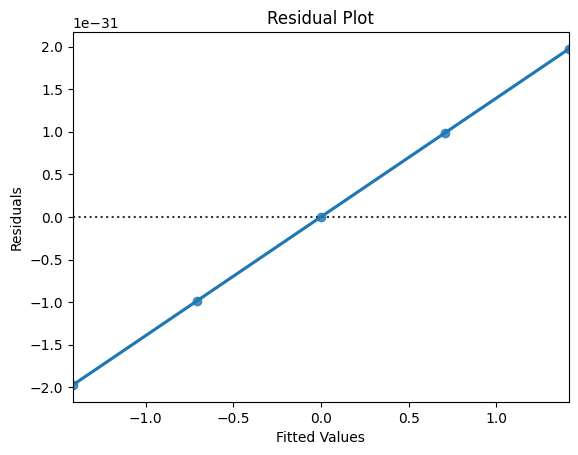

In [49]:
model = sm.OLS(y_std, X_std).fit()
residuals = model.resid
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

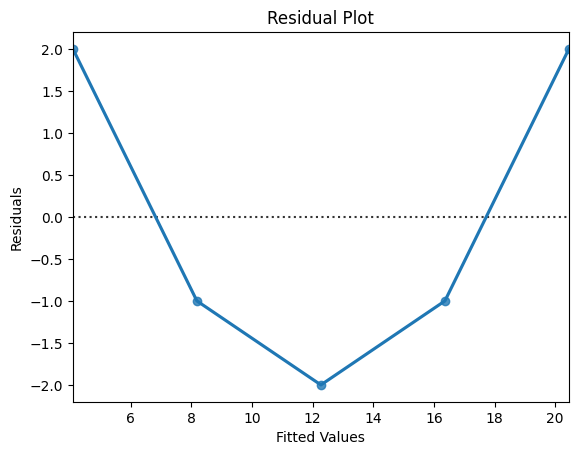

In [50]:
r_model = sm.OLS(y, X).fit()
r_residuals = r_model.resid
sns.residplot(x=r_model.fittedvalues, y=r_residuals, lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### Scatter Plot

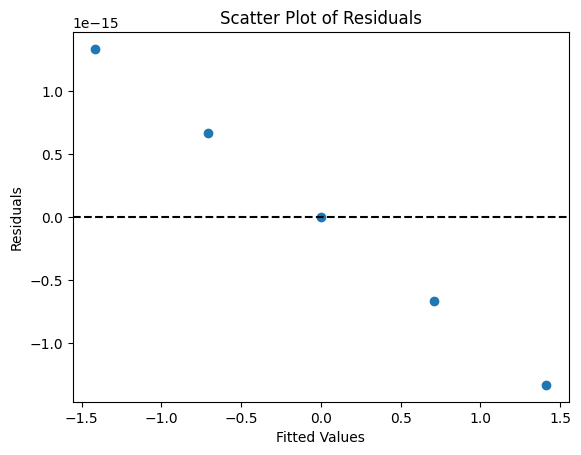

In [51]:
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='black', linestyle='--') #Add a horizontal line at y=0 for reference
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Scatter Plot of Residuals")
plt.show()

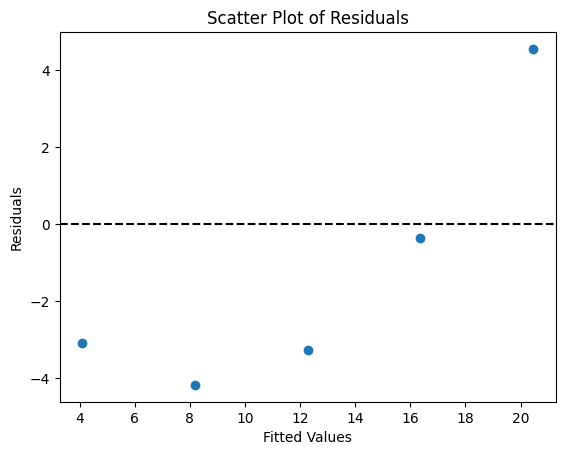

In [52]:
plt.scatter(r_model.fittedvalues, r_residuals)
plt.axhline(0, color='black', linestyle='--') #Add a horizontal line at y=0 for reference
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Scatter Plot of Residuals")
plt.show()

### Q-Q Plot

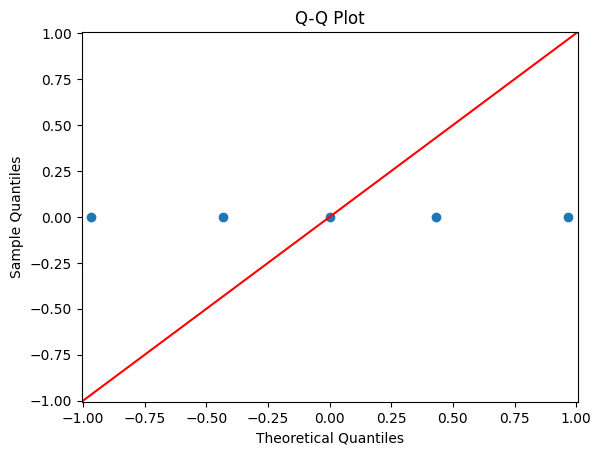

In [53]:
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot")
plt.show()

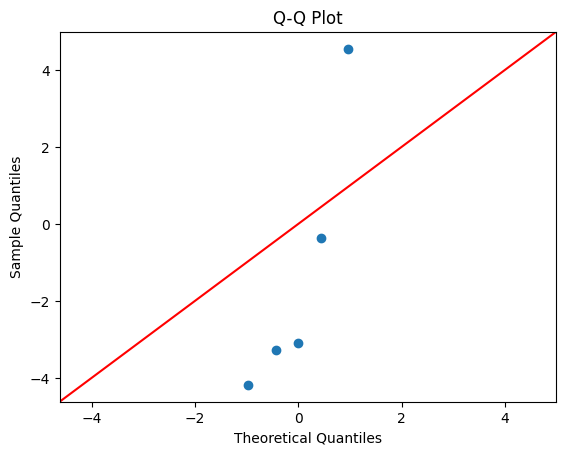

In [54]:
sm.qqplot(r_residuals, line='45')
plt.title("Q-Q Plot")
plt.show()

# Polynomial Regression:

## What Is Polynomial Regression?

Imagine you're trying to fit a line through a set of points. In simple linear regression, we fit a straight line (like drawing a ruler-straight line through a scatter plot). But not all data fits nicely into a straight line. Sometimes, the data curves. That's where **polynomial regression** comes in.

### Real-Life Analogy:

Think of a roller coaster track. You can't model it with a straight line, but with curves. Polynomial regression allows us to draw that curve to better match the twists and turns in our data.

---

## When to Use Polynomial Regression

- When the relationship between the independent variable `x` and the dependent variable `y` is **non-linear**.
- When your data shows **curvature** or changes direction.

---

## The Polynomial Regression Formula

For a **degree 2 polynomial regression**, the equation looks like this:

$$
    y = b_0 + b_1x + b_2x^2
$$

This is similar to a quadratic equation.

### Breaking It Down:

- \(b_0\): Intercept (the point where the curve crosses the y-axis)
- \(b_1x\): Linear term (like in simple linear regression)
- \(b_2x^2\): Curved term (makes the line bend)

You can extend this to higher degrees:

$$
    y = b_0 + b_1x + b_2x^2 + b_3x^3 + ... + b_nx^n
$$

---


In [55]:
x = [-2, -1, 0, 1,2]
y = [7, 4,5, 10, 19 ]

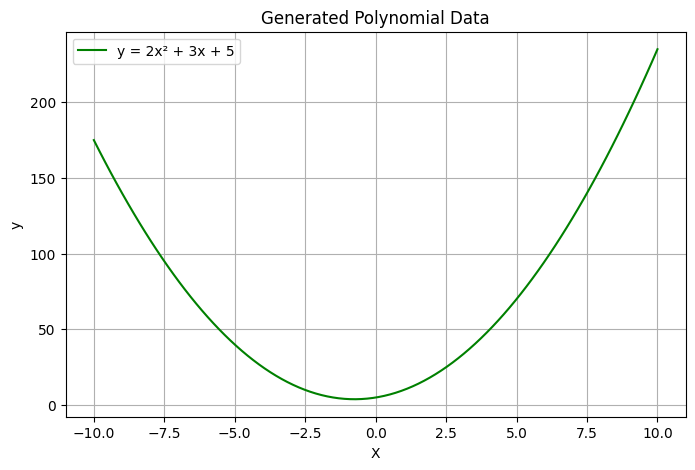

In [56]:
# Generate X values
X = np.linspace(-10, 10, 100)
# Generate y using a polynomial function y = 2x^2 + 3x + 5
y = 2 * X**2 + 3 * X + 5

# Plotting the polynomial data
plt.figure(figsize=(8, 5))
plt.plot(X, y, label='y = 2x² + 3x + 5', color='green')
plt.title('Generated Polynomial Data')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


# Comparing Linear vs Polynomial Regression on Curved Data


---

## Scenario: Fitting a Curve
We are using a synthetic dataset generated by a quadratic function:

In [57]:

X = np.linspace(-10, 10, 100)
y = 2 * X**2 + 3 * X + 5

Here, the data clearly follows a **curved (quadratic)** pattern. A linear model won’t capture this curvature well.

---

## Comparison

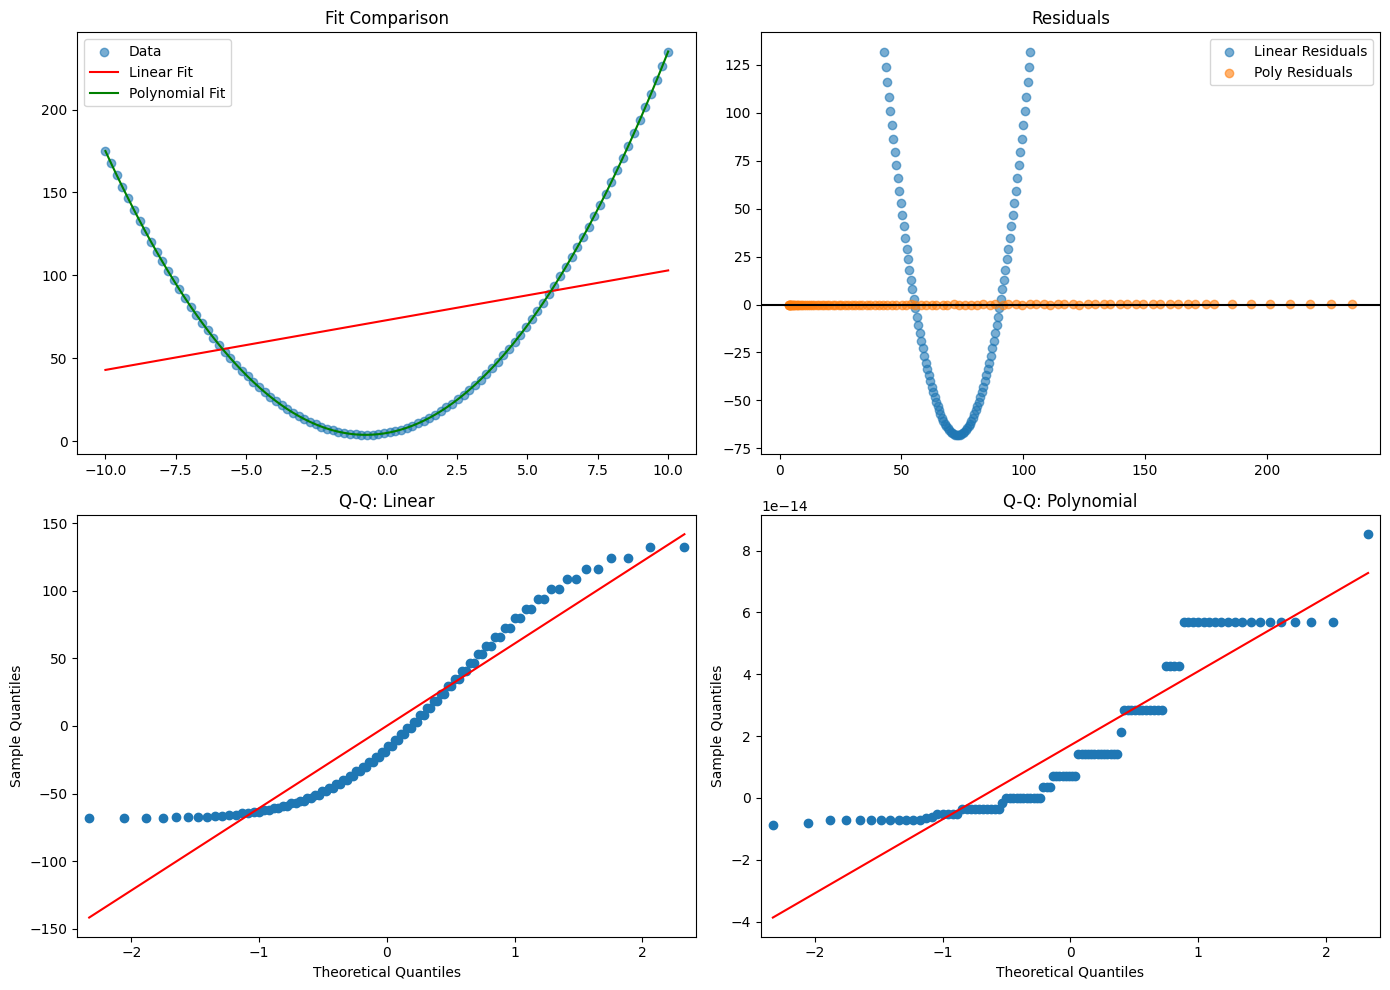

In [58]:

# Reshape for sklearn
X = X.reshape(-1, 1)


### 2. Fit a Linear Model (Baseline)
X_linear = sm.add_constant(X)
model_linear = sm.OLS(y, X_linear).fit()
y_pred_linear = model_linear.predict(X_linear)


### 3. Fit a Polynomial Model (Degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly_sm = sm.add_constant(X_poly)
model_poly = sm.OLS(y, X_poly_sm).fit()
y_pred_poly = model_poly.predict(X_poly_sm)


## Visualizations

residuals_linear = y - y_pred_linear
residuals_poly = y - y_pred_poly

plt.figure(figsize=(14, 10))

# Scatter with Fits
plt.subplot(2, 2, 1)
plt.scatter(X, y, label='Data', alpha=0.6)
plt.plot(X, y_pred_linear, color='red', label='Linear Fit')
plt.plot(X, y_pred_poly, color='green', label='Polynomial Fit')
plt.title('Fit Comparison')
plt.legend()

# Residuals
plt.subplot(2, 2, 2)
plt.scatter(y_pred_linear, residuals_linear, label='Linear Residuals', alpha=0.6)
plt.scatter(y_pred_poly, residuals_poly, label='Poly Residuals', alpha=0.6)
plt.axhline(0, color='black')
plt.title('Residuals')
plt.legend()

# Q-Q Plots
plt.subplot(2, 2, 3)
qqplot(residuals_linear, line='s', ax=plt.gca())
plt.title('Q-Q: Linear')

plt.subplot(2, 2, 4)
qqplot(residuals_poly, line='s', ax=plt.gca())
plt.title('Q-Q: Polynomial')

plt.tight_layout()
plt.show()

In [59]:
## Model Evaluation
print("--- Linear Regression Summary ---")
print(model_linear.summary())

print("\n--- Polynomial Regression Summary ---")
print(model_poly.summary())

--- Linear Regression Summary ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     8.107
Date:                Mon, 21 Jul 2025   Prob (F-statistic):            0.00537
Time:                        21:09:05   Log-Likelihood:                -552.69
No. Observations:                 100   AIC:                             1109.
Df Residuals:                      98   BIC:                             1115.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.0

---

## Practice Exercises

1. Apply a log transformation to a skewed variable and visualize before/after.
2. Create a polynomial regression model to fit a curved trend.
3. Plot residuals and interpret the pattern.
4. Use a Q-Q plot to test the normality of residuals.
5. Explain each assumption in your own words with examples.

---

## Summary

- Diagnostics help validate the integrity of a regression model.
- Transformations adjust data to better meet assumptions.
- LINE (Linearity, Independence, Normality, Equal Variance) is essential for accurate modeling.
- Visual tools like residual and Q-Q plots offer insight into problems.

Next step: Try these diagnostics on real datasets to develop an intuition for regression behavior.